In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(540, 540, 3)


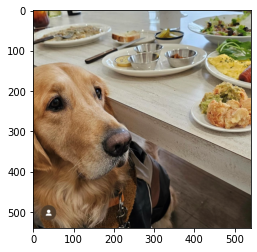

In [3]:
# Ïù¥ÎØ∏ÏßÄ Î∂àÎü¨Ïò§Í∏∞
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/dogbig.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape) # Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞ ÌôïÏù∏

# Î∂àÎü¨Ïò® Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(ÏÇ¨ÏßÑÏ∂úÏ≤ò : Ïù∏Ïä§ÌÉÄÍ∑∏Îû® "life_of_duckoo")

#### PixelLibÏùò pascalvoc ÏÉàÍ∑∏Îß®ÌÖåÏù¥ÏÖò Ìï®Ïàò ÎèôÎ¨ºÎèÑ Ïûò Ïù∏ÏãùÌïúÎã§Í≥† ÌïòÏó¨ÏÑú Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©

In [4]:
# Î™®Îç∏ Í∞ÄÏ†∏Ïò§Í∏∞
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLibÍ∞Ä Ï†úÍ≥µÌïòÎäî Î™®Îç∏Ïùò url
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# Îã§Ïö¥Î°úÎìú ÏãúÏûë
urllib.request.urlretrieve(model_url, model_file) 
# urllib Ìå®ÌÇ§ÏßÄ ÎÇ¥Ïóê ÏûàÎäî request Î™®ÎìàÏùò urlretrieve Ìï®ÏàòÎ•º Ïù¥Ïö©Ìï¥ÏÑú model_urlÏóê ÏûàÎäî ÌååÏùºÏùÑ Îã§Ïö¥Î°úÎìú Ìï¥ÏÑú model_file ÌååÏùºÎ™ÖÏúºÎ°ú Ï†ÄÏû•

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7feb41baf820>)

#### Î™®Îç∏ ÏÉùÏÑ±

In [8]:
 #PixelLib ÌÅ¥ÎûòÏä§Î•º Í∞ÄÏ†∏ÏôÄÏÑú semantic segmentation Ïù∏Ïä§ÌÑ¥Ïä§Î•º ÎßåÎì¨
model = semantic_segmentation()

# pascal vocÏóê ÎåÄÌï¥ ÌõàÎ†®Îêú ÏòàÏô∏ Î™®Îç∏(model_file)ÏùÑ Î°úÎìúÌïòÎäî Ìï®ÏàòÎ•º Ìò∏Ï∂ú
model.load_pascalvoc_model(model_file) 

- segmentAsPascalvoc()Ìï®ÏàòÎ•º Ìò∏Ï∂ú ÌïòÏó¨ ÏûÖÎ†•Îêú Ïù¥ÎØ∏ÏßÄÏùò "Î∂ÑÌï†, Î∂ÑÌï† Ï∂úÎ†•Ïùò Î∞∞Ïó¥"ÏùÑ Í∞ÄÏ†∏Ïò¥
- Î∂ÑÌï†, pacalvoc Îç∞Ïù¥ÌÑ∞Î°ú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÏó¨ ÏßÑÌñâÎê®

In [15]:
segvalues, output = model.segmentAsPascalvoc(img_path) 

In [16]:
# pascalvoc Îç∞Ïù¥ÌÑ∞Ïùò ÎùºÎ≤®Ï¢ÖÎ•ò
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

#### Ìï®Ïàò`segmentAsPascalvoc()`Ìò∏Ï∂úÌïòÏó¨ ÏñªÎäî Í≤∞Í≥ºÍ∞í(segvalues, output)ÌôïÏù∏. 

In [17]:
# segvaluesÏ§ë Ïù∏Ïä§ÌÑ¥Ïä§Î°ú Ïù∏ÏãùÎêú Í≤É ÌôïÏù∏ (class_ids)
print(segvalues)

{'class_ids': array([ 0,  5, 11, 12]), 'masks': array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])}


In [18]:
# segvaluesÏ§ë Ïù∏Ïä§ÌÑ¥Ïä§Î°ú Ïù∏ÏãùÎêú Í≤É ÌôïÏù∏ (ÏòÅÎ¨∏Î™Ö)
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
diningtable
dog


- Output ÏãúÍ∞ÅÌôîÌïòÏó¨, Ïù∏Ïä§ÌÑ¥Ïä§ Íµ¨Î∂Ñ ÏûòÎêêÎÇò ÌôïÏù∏

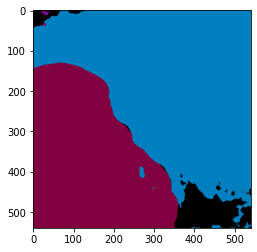

In [19]:
# segmentAsPascalvoc() Ìï®Ïàò Ìò∏Ï∂úÌïòÏó¨ ÏûÖÎ†•Îêú Ïù¥ÎØ∏ÏßÄÎ•º Î∂ÑÌï†Ìïú Îí§ ÎÇòÏò® Í≤∞Í≥ºÍ∞í Ï§ë 
# outputÏùÑ matplotlibÏùÑ Ïù¥Ïö©Ìï¥ Ï∂úÎ†•
plt.imshow(output)
plt.show()

#### class_id 4Í∞úÏùò rgbÎ•º ÏïåÍ≥†Ïûê Ìï®
 *BUT HOW?*
- Í∑∏ Îã§Ïùå color mapÏóêÏÑú (LABEL_NAMES indexÎî∞Îùº Îß§Ïπ≠Îê®) Ïù∏Ïä§ÌÑ¥Ïä§Î≥Ñ Ïª¨Îü¨ÏΩîÎìú ÌôïÏù∏ÌïòÍ∏∞
- Î∞∞Í≤Ω(0), Î≥ë(5), ÏãùÌÉÅ(11), Í∞ú(12)

In [21]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #ÏÉùÏÑ±Ìïú 20Í∞úÏùò Ïª¨Îü¨Îßµ Ï∂úÎ†•

print(colormap[0])   # Î∞∞Í≤Ω
print(colormap[5])   # Î≥ë
print(colormap[11])  # ÏãùÌÉÅ
print(colormap[12])  # Í∞ú

[0 0 0]
[128   0 128]
[192 128   0]
[ 64   0 128]


#### DogÏùò ÏÉâÏÉÅÏàúÏÑú Î∞îÍøîÏ£ºÍ∏∞ : BGR ÏàúÏúºÎ°ú Ï†ïÎ¶¨Îêú color mapÏùÑ RGBÎ°ú Î∞îÍøîÏ£ºÍ∏∞
- person ( 64   0 128)Îäî ÏÇ¨Ïã§ (128, 0, 64)Ïù∏Í≤É!

In [22]:
seg_color = (128,0,64) # RGB -> BGR 

(540, 540)


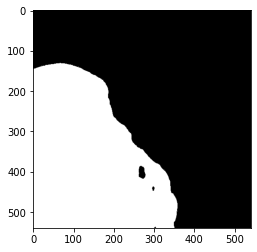

In [23]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

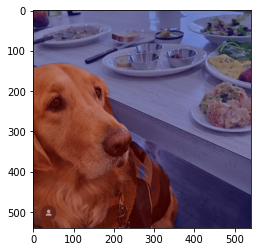

In [24]:
# ÏõêÎ≥∏Ïù¥ÎØ∏ÏßÄÎ•º img_showÏóê Ìï†ÎãπÌïúÎí§ Ïù¥ÎØ∏ÏßÄ dogÏù¥ ÏûàÎäî ÏúÑÏπòÏôÄ Î∞∞Í≤ΩÏùÑ Î∂ÑÎ¶¨Ìï¥ÏÑú ÌëúÌòÑÌïú color_mask Î•º ÎßåÎì†Îí§ Îëê Ïù¥ÎØ∏ÏßÄÎ•º Ìï©Ï≥êÏÑú Ï∂úÎ†•
img_show = img_orig.copy()

# TrueÍ≥º FalseÏù∏ Í∞íÏùÑ Í∞ÅÍ∞Å 255Í≥º 0ÏúºÎ°ú Î∞îÍøîÏ§çÎãàÎã§
img_mask = seg_map.astype(np.uint8) * 255

# 255ÏôÄ 0ÏùÑ Ï†ÅÎãπÌïú ÏÉâÏÉÅÏúºÎ°ú Î∞îÍøîÎ¥ÖÎãàÎã§
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄÏôÄ ÎßàÏä§Ìä∏Î•º Ï†ÅÎãπÌûà Ìï©Ï≥êÎ¥ÖÎãàÎã§
# 0.6Í≥º 0.4Îäî Îëê Ïù¥ÎØ∏ÏßÄÎ•º ÏÑûÎäî ÎπÑÏú®ÏûÖÎãàÎã§.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

### üìå Î∞∞Í≤ΩÏùÑ ÌùêÎ¶¨Í≤å ÌïòÍ∏∞!

#### ÌùêÎ¶∞ Î∞∞Í≤Ω Ïù¥ÎØ∏ÏßÄ ÎßåÎì§Í∏∞ (1/2) :  `img_orig_blur`(Î∞∞Í≤ΩÏö© Ïù¥ÎØ∏ÏßÄ)Î•º `cv2.blur` Ìï®ÏàòÎ°ú ÌùêÎ¶¨Í≤å ÌïúÎã§

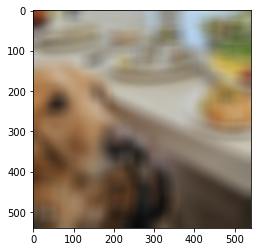

In [31]:
# (k1,k1)ÏùÄ blurring kernel sizeÎ•º ÎúªÌï©ÎãàÎã§
img_orig_blur = cv2.blur(img_orig, (39,39))  # (img_orig, (99,99))

# cv2.COLOR_BGR2RGB: ÏõêÎ≥∏Ïù¥ BGR ÏàúÏÑúÎ°ú ÌîΩÏÖÄÏùÑ ÏùΩÎã§Î≥¥Îãà Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Ï±ÑÎÑê Î≥ÄÍ≤Ω
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB)) # BGR ÌòïÏãù -> RGB ÌòïÏãù   
plt.show()

#### ÌùêÎ¶∞ Î∞∞Í≤Ω Ïù¥ÎØ∏ÏßÄ ÎßåÎì§Í∏∞ (2/2) : ÏÇ¨ÎûåÏùÑ ÏßÄÏö¥Îã§

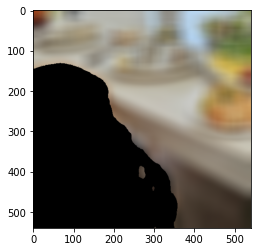

In [32]:
# DogÏùò ÎßàÏä§ÌÅ¨ Ïù∏Ïãù
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): Ïù¥ÎØ∏ÏßÄÍ∞Ä Î∞òÏ†ÑÎê©ÎãàÎã§. Î∞∞Í≤ΩÏù¥ 0 ÏÇ¨ÎûåÏù¥ 255 ÏòÄÏúºÎÇò
# Ïó∞ÏÇ∞ÏùÑ ÌïòÍ≥† ÎÇòÎ©¥ Î∞∞Í≤ΩÏùÄ 255 ÏÇ¨ÎûåÏùÄ 0ÏûÖÎãàÎã§.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Î∞∞Í≤ΩÎßå ÏûàÎäî ÏòÅÏÉÅÏùÑ ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§.
# 0Í≥º Ïñ¥Îñ§ ÏàòÎ•º bitwise_and Ïó∞ÏÇ∞ÏùÑ Ìï¥ÎèÑ 0Ïù¥ ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê 
# ÏÇ¨ÎûåÏù¥ 0Ïù∏ Í≤ΩÏö∞ÏóêÎäî ÏÇ¨ÎûåÏù¥ ÏûàÎçò Î™®Îì† ÌîΩÏÖÄÏù¥ 0Ïù¥ Îê©ÎãàÎã§. Í≤∞Íµ≠ ÏÇ¨ÎûåÏù¥ ÏÇ¨ÎùºÏßÄÍ≥† Î∞∞Í≤ΩÎßå ÎÇ®ÏïÑÏöî!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

#### ÏÇ¨ÎûåÏÇ¨ÏßÑÍ≥º Î∞∞Í≤ΩÏÇ¨ÏßÑÏùÑ Ìï©ÌïúÎã§! 

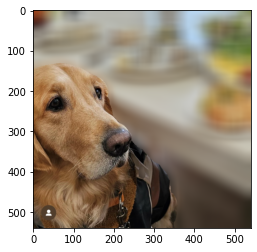

In [33]:
# np.where(Ï°∞Í±¥, Ï∞∏ÏùºÎïå, Í±∞ÏßìÏùºÎïå)
# ÏÑ∏Í∑∏Î©òÌÖåÏù¥ÏÖò ÎßàÏä§ÌÅ¨Í∞Ä 255Ïù∏ Î∂ÄÎ∂ÑÎßå ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ Í∞íÏùÑ Í∞ÄÏßÄÍ≥† Ïò§Í≥† 
# ÏïÑÎãå ÏòÅÏó≠ÏùÄ Î∏îÎü¨Îêú Ïù¥ÎØ∏ÏßÄ Í∞íÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§.
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
# plt.imshow(): Ï†ÄÏû•Îêú Îç∞Ïù¥ÌÑ∞Î•º Ïù¥ÎØ∏ÏßÄÏùò ÌòïÏãùÏúºÎ°ú ÌëúÏãúÌïúÎã§.
# cv2.cvtColor(ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄ, ÏÉâÏÉÅ Î≥ÄÌôò ÏΩîÎìú): ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏÉÅ Ï±ÑÎÑêÏùÑ Î≥ÄÍ≤Ω
# cv2.COLOR_BGR2RGB: ÏõêÎ≥∏Ïù¥ BGR ÏàúÏÑúÎ°ú ÌîΩÏÖÄÏùÑ ÏùΩÎã§Î≥¥Îãà 
# Ïù¥ÎØ∏ÏßÄ ÏÉâÏÉÅ Ï±ÑÎÑêÏùÑ Î≥ÄÍ≤ΩÌï¥ÏïºÌï® (BGR ÌòïÏãùÏùÑ RGB ÌòïÏãùÏúºÎ°ú Î≥ÄÍ≤Ω)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()